# Assignment 3: Linear Regression and Gradient Descent from the Ground Up

The goal of this assignment is to work through the fundamentals of Simple Linear Regression (one independent variable) with Mean Squared Error (average L2 loss) using Gradient Descent.

## Submission Instructions

- Please submit your notebook as a **Jupyter Notebook** on Canvas.
- **Due Date: Wednesday, October 22 at 6:59pm**. 
- **No late submissions** will be accepted for this assignment.

 ## Collaboration:



You are allowed to work with others on this assignment.

Please list the names of those you work with below.

Collaborators: Myself(Isaia Pacheco)

## Part 0 - Imports and CoW

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor

In [83]:
#Set Copy-on-Write
pd.options.mode.copy_on_write = True

## Part 1 : Linear Regression
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and we receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

In [84]:
b_hat = np.array([1, 2, 1])
x = np.array([4, 2, 1])
y_hat = np.sum(b_hat * x)
print('Ŷ: ', y_hat)

Ŷ:  9


### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

In [85]:
y = [6.1]
squared_errors = np.square(y - y_hat)
l2_loss = np.sum(squared_errors)
print('L2 Loss: ', l2_loss)

L2 Loss:  8.410000000000002


## Part 2 : Gradient Descent with One Parameter

The following function generates the dataset you need for the rest of the questions

In [86]:
data_slope = 10
num_iterations = 100
initial_slope = 0.1
alpha1 = 0.01
alpha2 = 0.1
with_intercept1 = False
with_intercept2 = True
RANDOM_SEED = 577
np.random.seed(RANDOM_SEED)

In [87]:
# This function helps generate a synthetic dataset based on a given slope value
def generate_dataset(slope, std=1, num_samples=100):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std
    Y = slope * X + e
    intercept = -int(True) * 2
    Y_INT = Y + intercept
    data = pd.DataFrame({'X': X, 'Y': Y, 'Y_INT': Y_INT})
    return data

In [88]:
df = generate_dataset(slope=data_slope, num_samples=num_iterations)

### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of slope that the gradient descent algorithm can find in 100 iterations for initial slope=0.1 and $\alpha=0.01$.

In [89]:
def gradient_descent(fn, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * fn(guess)
        guesses.append(guess)
    return np.array(guesses)


def calc_y_hat_no_bias(slope, x):
    return slope * x


def get_x_y(data, with_intercept=False):
    x = data['X']
    y_obs = data['Y_INT'] if with_intercept else data['Y']
    return (x, y_obs)


def mse_loss(slope, data, with_intercept=False):
    ''' Mean Squared Error Loss Function '''
    x, y_obs = get_x_y(data, with_intercept)
    y_hat = calc_y_hat_no_bias(slope, x)
    return np.mean((y_hat - y_obs) ** 2)


def mse_loss_derivative(slope, data, with_intercept=False):
    x, y_obs = get_x_y(data, with_intercept)
    y_hat = calc_y_hat_no_bias(slope, x)
    return np.mean(2 * (y_hat - y_obs) * x)


def linear_regression(data, num_iterations, initial_slope, alpha, with_intercept=False):
    print(f'α={alpha}, intercept={with_intercept}, initial slope={initial_slope}, iterations={num_iterations}')
    loss_function_partial_derivative = lambda beta: mse_loss_derivative(beta, data, with_intercept)
    model_df = data.copy(deep=True)
    model_df['∇MSE/β'] = gradient_descent(loss_function_partial_derivative, initial_guess=initial_slope, alpha=alpha,
                                          n=num_iterations)
    model_df['LOSS(∇MSE/β)'] = model_df['∇MSE/β'].apply(lambda gradient: mse_loss(gradient, model_df, with_intercept))
    beta = model_df.iloc[model_df['LOSS(∇MSE/β)'].idxmin()]['∇MSE/β'] #or model_df.iloc[num_iterations-1]['∇MSE/β']?
    model_df['Ŷ'] = model_df['X'].apply(lambda x: calc_y_hat_no_bias(beta, x))
    print(f'best slope = {beta}')
    return model_df

'''@:param suffix 'no_bias' or 'with_bias' '''
def calculate_residuals(data, suffix='no_bias'):
    y_hat = 'Ŷ' if suffix == 'no_bias' else 'Ŷ_SKLEARN_SGD'
    data[f'e_{suffix}'] = data[y_hat] - data['Y']


In [90]:
df_2a = linear_regression(df, num_iterations, initial_slope, alpha1, with_intercept1)
calculate_residuals(df_2a, 'no_bias')

α=0.01, intercept=False, initial slope=0.1, iterations=100
best slope = 4.953905974834135


In [91]:
df_2b = linear_regression(df, num_iterations, initial_slope, alpha1, with_intercept2)
calculate_residuals(df_2b, 'no_bias')

α=0.01, intercept=True, initial slope=0.1, iterations=100
best slope = 3.4775049394812245


### 2.b.

Now change the learning rate to be $\alpha=0.1$ and repeat 2.a


In [92]:
df_2c = linear_regression(df, num_iterations, initial_slope, alpha2, with_intercept1)
calculate_residuals(df_2c, 'no_bias')

α=0.1, intercept=False, initial slope=0.1, iterations=100
best slope = 9.882570904431695


In [93]:
df_2d = linear_regression(df, num_iterations, initial_slope, alpha2, with_intercept2)
calculate_residuals(df_2d, 'no_bias')

α=0.1, intercept=True, initial slope=0.1, iterations=100
best slope = 6.907029580269612


### 2.c.
Create a plot showing the simple linear regression models you fitted on the observed data when you pick the slope using the gradient descent algorithm above. Your plot should include at least the following:
- A scatter plot of all the observed data
- Regression lines for the simple linear regression models with and without an intercept
- An appropriate title, a legend showing which line is which, and labels for both axes

<Axes: title={'center': 'w/o Bias Term'}, xlabel='X', ylabel='Y'>

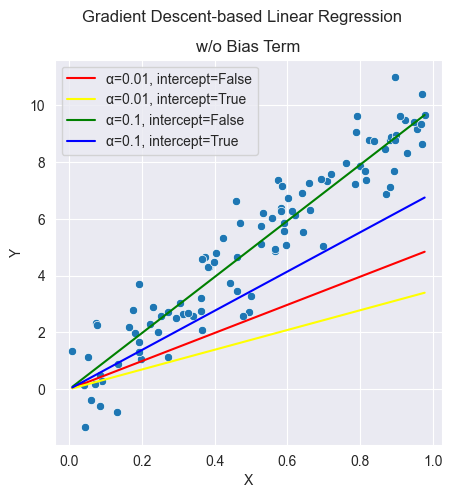

In [94]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.suptitle('Gradient Descent-based Linear Regression')
ax.set_title('w/o Bias Term')
sns.scatterplot(df, x='X', y='Y', ax=ax)
sns.lineplot(data=df_2a, x='X', y='Ŷ', color="red", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax)
sns.lineplot(data=df_2b, x='X', y='Ŷ', color="yellow", label=f'α={alpha1}, intercept={with_intercept2}', ax=ax)
sns.lineplot(data=df_2c, x='X', y='Ŷ', color="green", label=f'α={alpha2}, intercept={with_intercept1}', ax=ax)
sns.lineplot(data=df_2d, x='X', y='Ŷ', color="blue", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax)

By this graph, the green graph most fits the data without the intercept, the blue most fits the data with the intercept. The red and the yellow line dont fit the data "well" but the yellow seems to account for the intercept (we know know the question usually we wouldnt), I also like to point out that the line may fit data we've seen. It does not tell us anything about data we havent seen and how well it performs which essentially is more important. For that reason I cant determine which setting was "better".

<Axes: title={'center': 'w/o Bias Term'}, xlabel='Y_INT', ylabel='e_no_bias'>

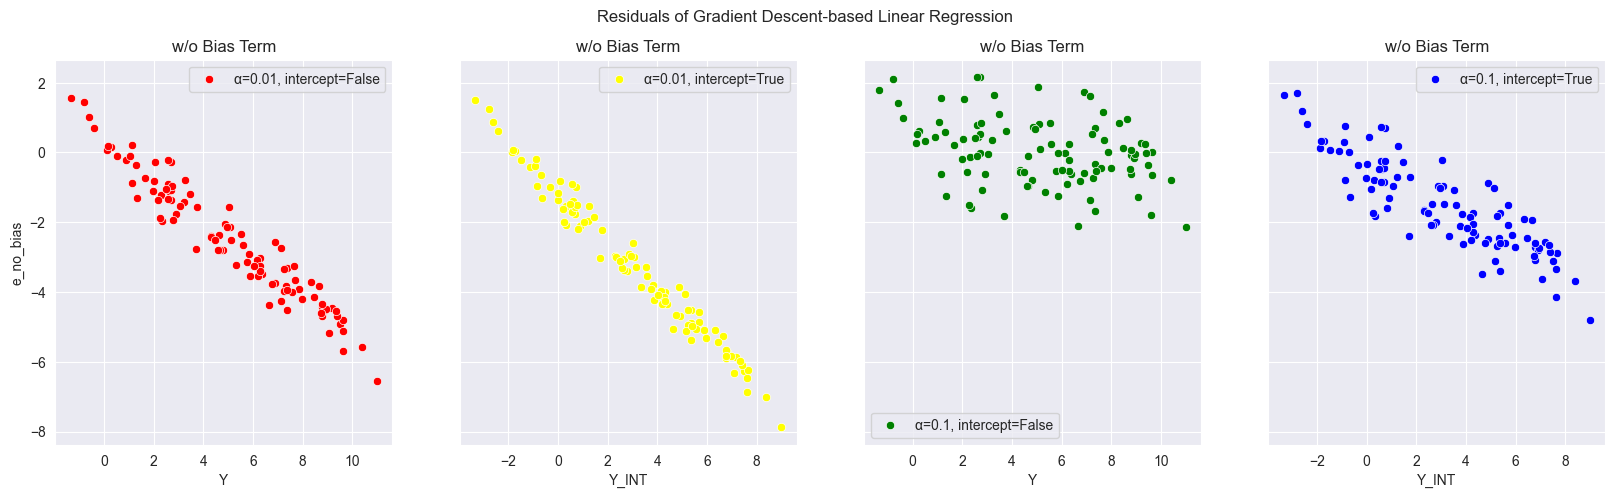

In [95]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
plt.suptitle('Residuals of Gradient Descent-based Linear Regression')
ax1.set_title('w/o Bias Term')
sns.scatterplot(data=df_2a, x='Y', y='e_no_bias', color="red", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax1)
ax2.set_title('w/o Bias Term')
sns.scatterplot(data=df_2b, x='Y_INT', y='e_no_bias', color="yellow", label=f'α={alpha1}, intercept={with_intercept2}', ax=ax2)
ax3.set_title('w/o Bias Term')
sns.scatterplot(data=df_2c, x='Y', y='e_no_bias', color="green", label=f'α={alpha2}, intercept={with_intercept1}', ax=ax3)
ax4.set_title('w/o Bias Term')
sns.scatterplot(data=df_2d, x='Y_INT', y='e_no_bias', color="blue", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax4)

### 2.d.
Which value of $\alpha$ resulted in a better model? Why?

Best to last in terms of Residuals

When Intercept False
1. Green
2. Red


When Intercept True
1. Blue
2. Yellow


The green line, is the most horizontalish along the e = 0, (which is what we expected)
the red line is negative trending, but the red line has less spread than green.

The blue line is the most horizontalish along e = -2  (which is what we expected)
The yellow line is slightly negative trending but around the e=-2, but the yellow line has less spread than blue.

## Part 3 : Gradient Descent with 1-2 parameters

### 3.a. 
Problem 2 did not include an intercept term (or "bias" term). Write a function calculate_y_hat(X, Y, with_intercept) that computes the value of y_hat for your model using either one or two parameters (slope and intercept or just slope) based on whether or not an intercept term is specified within the model. The argument with_intercept should be a boolean.

Hint: Use sklearn.linear_model.LinearRegression library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [96]:
def calculate_y_hat(data, initial_guess, alpha, with_intercept=False):
    X, Y = get_x_y(data, with_intercept=with_intercept)
    X = data[['X']] # X needs to be 2-dimensional
    model = SGDRegressor(loss='squared_error', alpha=alpha, eta0=initial_guess, max_iter=num_iterations,
                         random_state=RANDOM_SEED)
    model.fit(X, Y)
    return model.predict(X)

In [97]:
df_2a['Ŷ_SKLEARN_SGD'] = calculate_y_hat(df_2a, initial_slope, alpha1, with_intercept=with_intercept1)
calculate_residuals(df_2a, 'with_bias')
df_2b['Ŷ_SKLEARN_SGD'] = calculate_y_hat(df_2b, initial_slope, alpha1, with_intercept=with_intercept2)
calculate_residuals(df_2b, 'with_bias')
df_2c['Ŷ_SKLEARN_SGD'] = calculate_y_hat(df_2c, initial_slope, alpha2, with_intercept=with_intercept1)
calculate_residuals(df_2c, 'with_bias')
df_2d['Ŷ_SKLEARN_SGD'] = calculate_y_hat(df_2d, initial_slope, alpha2, with_intercept=with_intercept2)
calculate_residuals(df_2d, 'with_bias')

### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. State your choice of learning rate. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should use different colors for the two line plots

<Axes: title={'center': 'w Bias Term'}, xlabel='X', ylabel='Y'>

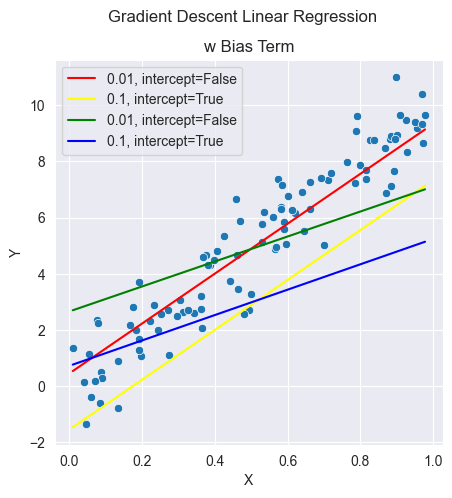

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.suptitle('Gradient Descent Linear Regression')
ax.set_title('w Bias Term')
sns.scatterplot(df, x='X', y='Y', ax=ax)
sns.lineplot(data=df_2a, x='X', y='Ŷ_SKLEARN_SGD', color="red", label=f'{alpha1}, intercept={with_intercept1}', ax=ax)
sns.lineplot(data=df_2b, x='X', y='Ŷ_SKLEARN_SGD', color="yellow", label=f'{alpha2}, intercept={with_intercept2}', ax=ax)
sns.lineplot(data=df_2c, x='X', y='Ŷ_SKLEARN_SGD', color="green", label=f'{alpha1}, intercept={with_intercept1}', ax=ax)
sns.lineplot(data=df_2d, x='X', y='Ŷ_SKLEARN_SGD', color="blue", label=f'{alpha2}, intercept={with_intercept2}', ax=ax)

By this graph, the red graph most fits the data without the intercept, the yellow most fits the data with the intercept. The green and the blue line dont fit the data "well" but the blue seems to account for the intercept (we know know the question usually we wouldnt), I also like to point out that the line may fit data we've seen. It does not tell us anything about data we havent seen and how well it performs which essentially is more important. For that reason I cant determine which setting was "better".

<Axes: title={'center': 'w Bias Term'}, xlabel='Y_INT', ylabel='e_with_bias'>

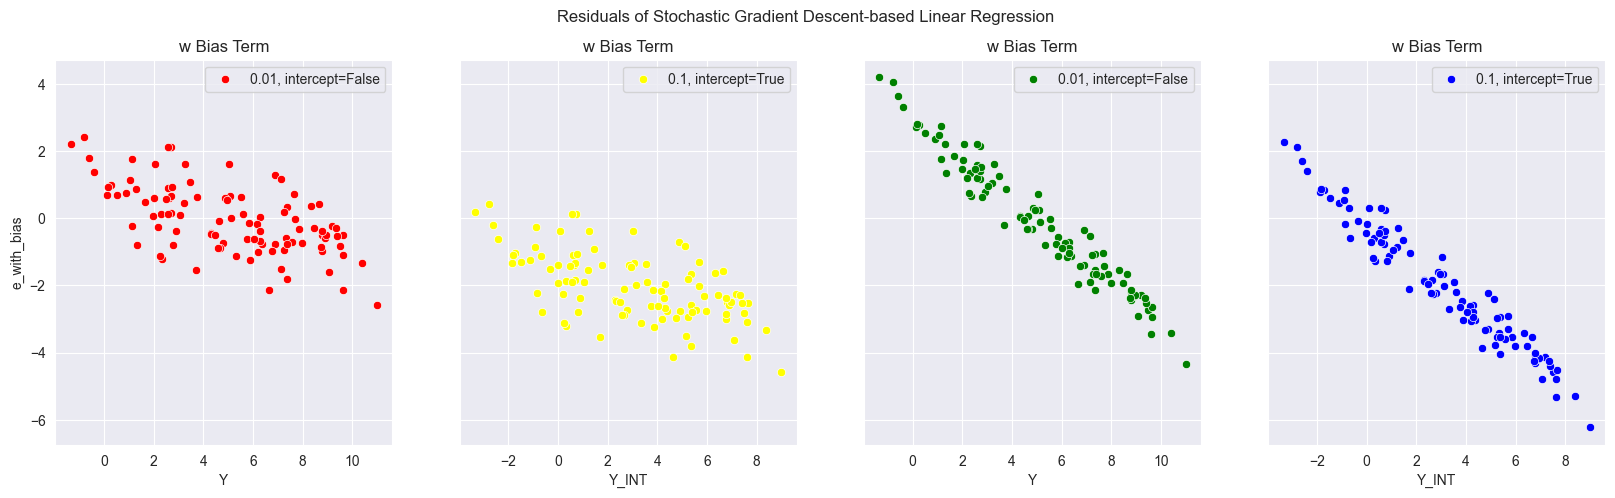

In [99]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
plt.suptitle('Residuals of Stochastic Gradient Descent-based Linear Regression')
ax1.set_title('w Bias Term')
sns.scatterplot(data=df_2a, x='Y', y='e_with_bias', color="red", label=f'{alpha1}, intercept={with_intercept1}', ax=ax1)
ax2.set_title('w Bias Term')
sns.scatterplot(data=df_2b, x='Y_INT', y='e_with_bias', color="yellow", label=f'{alpha2}, intercept={with_intercept2}', ax=ax2)
ax3.set_title('w Bias Term')
sns.scatterplot(data=df_2c, x='Y', y='e_with_bias', color="green", label=f'{alpha1}, intercept={with_intercept1}', ax=ax3)
ax4.set_title('w Bias Term')
sns.scatterplot(data=df_2d, x='Y_INT', y='e_with_bias', color="blue", label=f'{alpha2}, intercept={with_intercept2}', ax=ax4)

Best to last in terms of Residuals

When alpha is 0.01
1. Red
2. Green

When alpha is 0.1
1. Yellow
2. Blue


The red line, is the most horizontal along the e = 0 but the points are spread out, followed by yellow along -2 (which is what we expected) also spread out, green then blue. Yellow is slightly horizontal around e= -2 with less spread The green is trending downwards with roughly half of the errors above 0 and half below also with less spread than red. The blue is trending downwards, with roughly 80 percent of the data below the 0 and 20 above. with less spread than yellow.

#### (Extra) Recap of both models

<Axes: title={'center': 'w Bias Term'}, xlabel='X', ylabel='Y'>

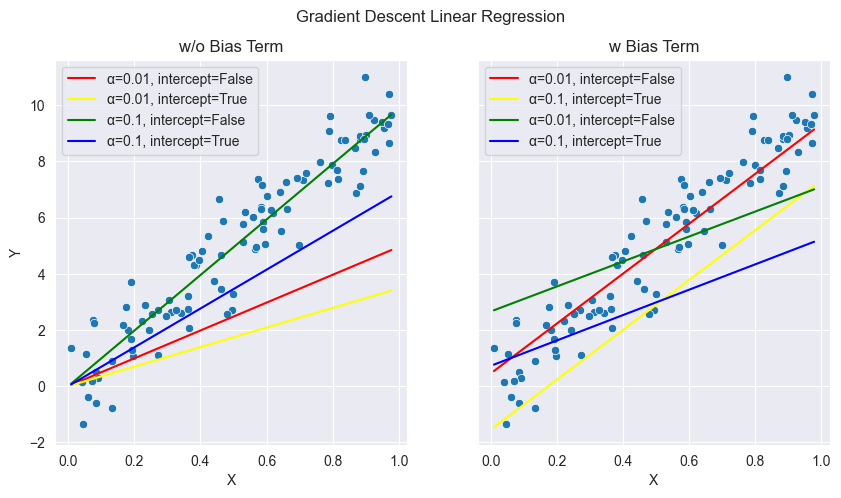

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.suptitle('Gradient Descent Linear Regression')
ax1.set_title('w/o Bias Term')
sns.scatterplot(df, x='X', y='Y', ax=ax1)
sns.lineplot(data=df_2a, x='X', y='Ŷ', color="red", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax1)
sns.lineplot(data=df_2b, x='X', y='Ŷ', color="yellow", label=f'α={alpha1}, intercept={with_intercept2}', ax=ax1)
sns.lineplot(data=df_2c, x='X', y='Ŷ', color="green", label=f'α={alpha2}, intercept={with_intercept1}', ax=ax1)
sns.lineplot(data=df_2d, x='X', y='Ŷ', color="blue", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax1)
ax2.set_title('w Bias Term')
sns.scatterplot(df, x='X', y='Y', ax=ax2)
sns.lineplot(data=df_2a, x='X', y='Ŷ_SKLEARN_SGD', color="red", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax2)
sns.lineplot(data=df_2b, x='X', y='Ŷ_SKLEARN_SGD', color="yellow", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax2)
sns.lineplot(data=df_2c, x='X', y='Ŷ_SKLEARN_SGD', color="green", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax2)
sns.lineplot(data=df_2d, x='X', y='Ŷ_SKLEARN_SGD', color="blue", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax2)

<Axes: title={'center': 'w Bias Term'}, xlabel='Y_INT', ylabel='e_with_bias'>

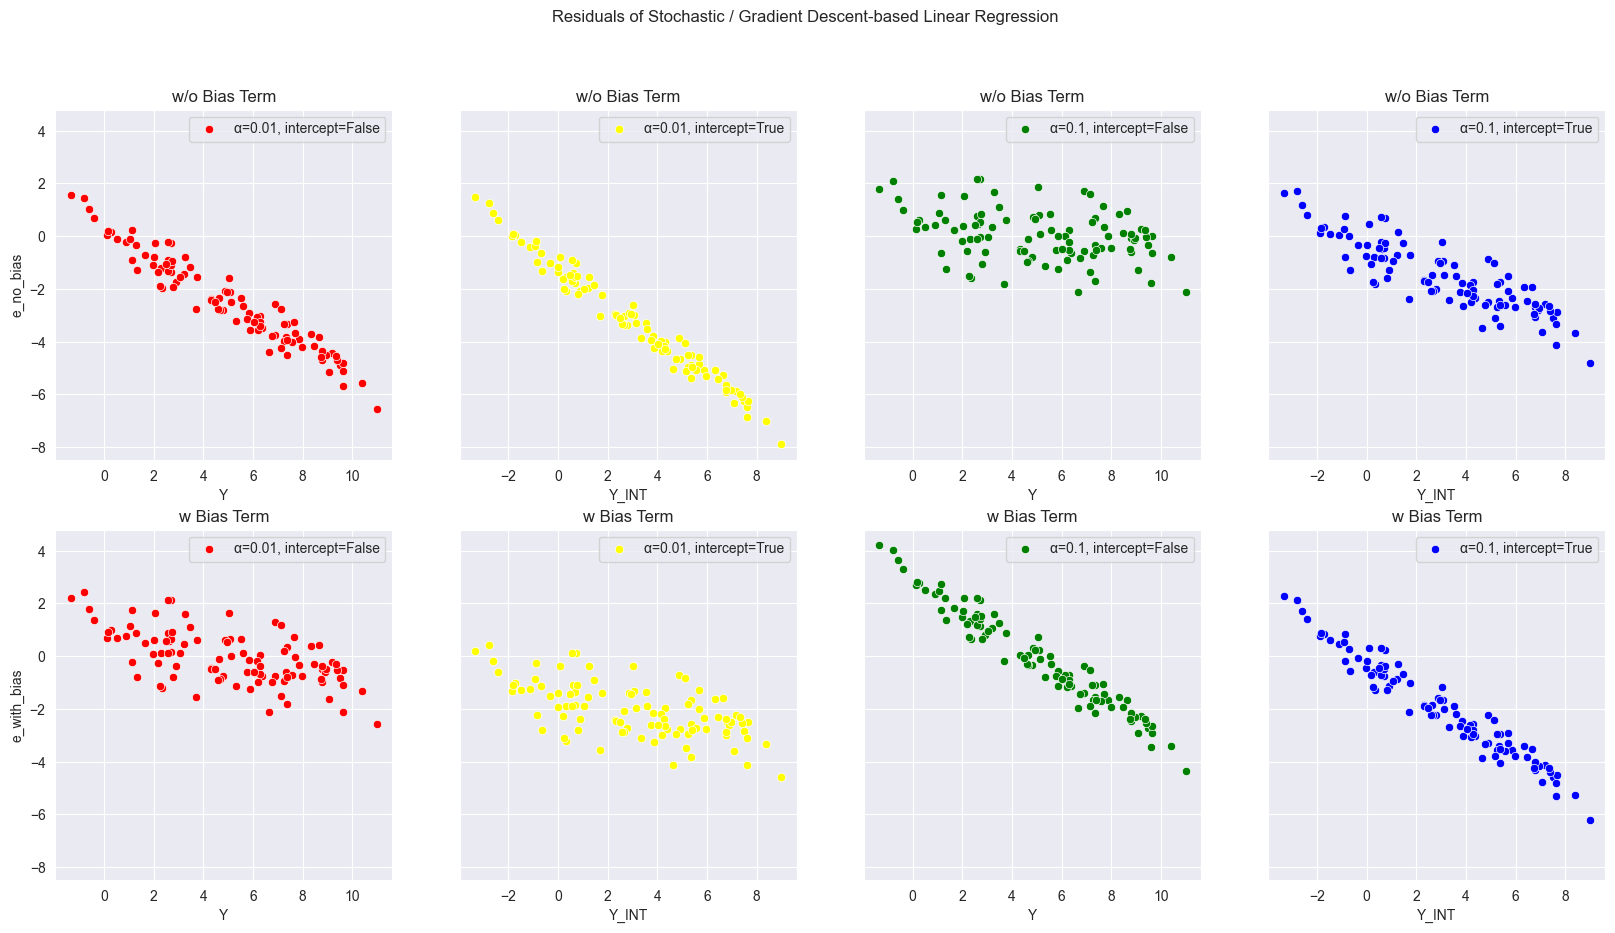

In [103]:
fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
plt.suptitle('Residuals of Stochastic / Gradient Descent-based Linear Regression')

ax1.set_title('w/o Bias Term')
sns.scatterplot(data=df_2a, x='Y', y='e_no_bias', color="red", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax1)
ax2.set_title('w/o Bias Term')
sns.scatterplot(data=df_2b, x='Y_INT', y='e_no_bias', color="yellow", label=f'α={alpha1}, intercept={with_intercept2}', ax=ax2)
ax3.set_title('w/o Bias Term')
sns.scatterplot(data=df_2c, x='Y', y='e_no_bias', color="green", label=f'α={alpha2}, intercept={with_intercept1}', ax=ax3)
ax4.set_title('w/o Bias Term')
sns.scatterplot(data=df_2d, x='Y_INT', y='e_no_bias', color="blue", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax4)

ax5.set_title('w Bias Term')
sns.scatterplot(data=df_2a, x='Y', y='e_with_bias', color="red", label=f'α={alpha1}, intercept={with_intercept1}', ax=ax5)
ax6.set_title('w Bias Term')
sns.scatterplot(data=df_2b, x='Y_INT', y='e_with_bias', color="yellow", label=f'α={alpha1}, intercept={with_intercept2}', ax=ax6)
ax7.set_title('w Bias Term')
sns.scatterplot(data=df_2c, x='Y', y='e_with_bias', color="green", label=f'α={alpha2}, intercept={with_intercept1}', ax=ax7)
ax8.set_title('w Bias Term')
sns.scatterplot(data=df_2d, x='Y_INT', y='e_with_bias', color="blue", label=f'α={alpha2}, intercept={with_intercept2}', ax=ax8)